In [1]:
import numpy as np
from scipy.optimize import minimize, root
from deap import base, creator, tools, algorithms
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import ellipk, ellipkinc
from scipy.special import ellipk, ellipkinc, ellipj, ellipeinc


C:\Users\Mohan Raj A\AppData\Local\Temp\ipykernel_26752\923053262.py:29: RuntimeWarning: invalid value encountered in subtract
  lhs = (3 * K_k - K_sigma0_k)**2


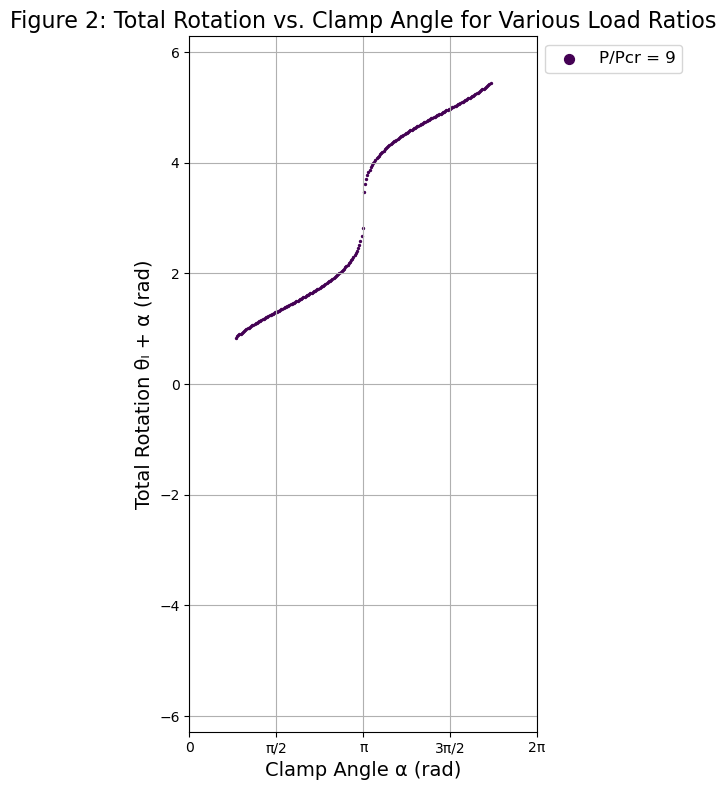

In [5]:

B = 1.0
l = 1.0
pi_sq_over_4 = (B * np.pi**2) / (4 * l**2)
P_cr = pi_sq_over_4
P_over_Pcr_values = [9]
num_alpha = 300
alphas = np.linspace(0, 2 * np.pi, num_alpha)
initial_guesses = np.linspace(0, 2 * np.pi, 100)
tolerance = 1e-4

def equilibrium_condition(theta_l, alpha, P_over_Pcr):
    lambda_sq = pi_sq_over_4 * P_over_Pcr
    k = np.sin((theta_l + alpha - np.pi) / 2)
    if np.abs(k) > 1:
        return 1e6
    if k == 0:
        return 1e6
    term = (1 / k) * np.sin((alpha - np.pi) / 2)
    if np.abs(term) > 1:
        return 1e6
    sigma0 = np.arcsin(term)
    K_k = ellipk(k**2)
    K_sigma0_k = ellipkinc(sigma0, k**2)
    lhs = (3 * K_k - K_sigma0_k)**2
    P_normalized = P_over_Pcr * P_cr
    return lhs - P_normalized

def find_unique_roots(theta_solutions, tol=tolerance):
    unique_solutions = []
    for sol in theta_solutions:
        if not any(np.isclose(sol, uniq, atol=tol) for uniq in unique_solutions):
            unique_solutions.append(sol)
    return unique_solutions

plt.figure(figsize=(8, 8))
ax = plt.gca()
colors = plt.cm.viridis(np.linspace(0, 1, len(P_over_Pcr_values)))

for idx, P_over_Pcr in enumerate(P_over_Pcr_values):
    theta_total_plot = []
    alpha_plot = []
    for alpha in alphas:
        theta_solutions = []
        for guess in initial_guesses:
            theta_l_solution, info, ier, mesg = fsolve(equilibrium_condition, guess, args=(alpha, P_over_Pcr), full_output=True)
            if ier == 1:
                theta_l = theta_l_solution[0]
                theta_solutions.append(theta_l)
        unique_solutions = find_unique_roots(theta_solutions)
        for theta_l in unique_solutions:
            theta_total = theta_l + alpha
            if 0 <= theta_total <= 2 * np.pi:
                theta_total_plot.append(theta_total)
                alpha_plot.append(alpha)
    theta_total_plot = np.array(theta_total_plot)
    alpha_plot = np.array(alpha_plot)
    plt.scatter(alpha_plot, theta_total_plot, s=2, color=colors[idx], label=f'P/Pcr = {P_over_Pcr}')

plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.ylabel('Total Rotation θₗ + α (rad)', fontsize=14)
plt.title('Figure 2: Total Rotation vs. Clamp Angle for Various Load Ratios', fontsize=16)
plt.legend(fontsize=12, markerscale=5, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xlim(0, 2 * np.pi)
plt.ylim(-2 * np.pi, 2 * np.pi)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', 'π/2', 'π', '3π/2', '2π'])
plt.tight_layout()
ax.set_aspect('equal', adjustable='box')
plt.show()
